# Drug Response Prediction Using Gene Expression Data

### Reading the Gene Response Dataset

## Loading and Preparing the Dataset

In this cell, we are performing the following steps to load and prepare our dataset for analysis:

1. **Suppress Warnings**:
   - We start by importing the `warnings` module to filter out any non-critical warnings, such as `FutureWarning`, which may arise from the underlying libraries (e.g., `pandas`). These warnings do not affect the functionality of the code but can clutter the output, so we choose to ignore them for a cleaner output.

2. **Import Required Libraries**:
   - We import `parse` from the `cmapPy.pandasGEXpress` library to read `.gctx` files, which is the file format of our dataset. 

3. **Define Dataset Path**:
   - We specify the file path to the `.gctx` file containing our dataset. In this case, the file is located at `'/home/batman/Downloads/Datasets/level5_beta_trt_misc_n8283x12328.gctx'`.

4. **Parse the .gctx File**:
   - Using the `parse` function from the `cmapPy.pandasGEXpress` library, we read the `.gctx` file. This function loads the `.gctx` file and stores it as an object containing various components, including the main data matrix.

5. **Extract Main Data as a DataFrame**:
   - We extract the main data matrix (the primary data content) from the parsed object and convert it into a `pandas` DataFrame. This allows us to perform various data manipulation and analysis tasks using `pandas` functionality.

6. **Reset Index**:
   - We reset the index of the DataFrame so that any hierarchical indices or other metadata are transformed into regular columns, making it easier to work with the dataset.

7. **Display the Data**:
   - Finally, we display the first few rows of the DataFrame using `df.head()` to inspect the data structure and verify that it was loaded correctly.

By the end of this cell, we have successfully loaded the `.gctx` dataset into a `pandas` DataFrame, ready for further exploration and analysis.


In [1]:
import warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

from cmapPy.pandasGEXpress.parse import parse

# Dataset path
gctx_file_path = '/home/batman/Downloads/Datasets/level5_beta_trt_misc_n8283x12328.gctx'

# Read the .gctx file
data = parse(gctx_file_path)

# Extract the main data as a pandas DataFrame
df = data.data_df
df = df.reset_index()

# Display the first few rows of the data
print(df.head())

cid    rid  ABY001_A375_XH:ADO-TRASTUZUMAB_EMTANSINE:0.3125:24  \
0       10                                           0.071321    
1      100                                           1.174841    
2     1000                                           0.396398    
3    10000                                          -0.301154    
4    10001                                           0.040449    

cid  ABY001_A375_XH:ADO-TRASTUZUMAB_EMTANSINE:0.3125:3  \
0                                            -0.135682   
1                                             0.447374   
2                                             0.241946   
3                                             0.012122   
4                                             1.011675   

cid  ABY001_A375_XH:ADO-TRASTUZUMAB_EMTANSINE:0.625:24  \
0                                            -0.244771   
1                                             1.119571   
2                                            -0.008839   
3                     

## Extracting Metadata from Column Names

In this cell, we extract metadata from the column names of our dataset to understand the different **cell lines**, **drugs**, **concentration values**, and **time points** represented in the data. Each column name in the dataset is structured with these attributes, separated by colons (e.g., `CellLine:Drug:Concentration:Time`). By extracting these values, we can get an overview of the diversity and scope of experimental conditions in the dataset.

### Steps in the Code

1. **Define a Regular Expression Pattern**:
   - We use a regular expression (regex) to identify and extract different parts of each column name. The regex pattern used is:
     ```regex
     (?P<cell_line>[^:]+):(?P<drug>[^:]+)(:(?P<concentration>\d*\.?\d*))?(:(?P<time>\d+))?
     ```
   - The pattern captures four possible parts:
     - **`cell_line`**: The first component before the colon, representing the cell line name.
     - **`drug`**: The second component, representing the drug name.
     - **`concentration`**: The optional third component, representing the drug concentration.
     - **`time`**: The optional fourth component, representing the time point of measurement.

2. **Initialize Lists**:
   - We initialize empty lists (`cell_line`, `drugs`, `conc_values`, and `time_points`) to store the extracted values for each respective category.

3. **Iterate Through Columns and Extract Values**:
   - For each column name in the dataset, we apply the regex pattern to extract the cell line, drug, concentration, and time point.
   - If a match is found:
     - We append the extracted values to their respective lists if they exist.
   - If a column name doesn’t match the expected pattern, it prints "No Match found!!" to flag any unexpected column format.

4. **Summarize and Print Unique Values**:
   - After extracting values from all columns, we convert each list to a set to identify unique values and print:
     - **Number of unique cell lines** and the list of cell line names.
     - **Number of unique drugs** and the list of drug names.
     - **Number of unique concentration values** and the list of concentrations.
     - **Number of unique time points** and the list of time points.

### Results

By the end of this cell, we get a detailed breakdown of the experimental setup, which is essential for understanding the dataset’s structure. Specifically, the output shows:
- **69 unique cell lines**
- **1018 unique drugs**
- **63 unique concentration values**
- **2 unique time points**

This information provides a foundation for further analysis, such as grouping or filtering the data based on these categories.


In [2]:
# Example cell line and drug for testing
# cell_line = 'A375'
# drug = 'ADO-TRASTUZUMAB_EMTANSINE'

# 8283 columns in the dataset

# ---------------------------------#
# 69 cell lines type               #
# 1018 Drug types                  #
# 63 conc values                   #
# 2 values for time                #
# ---------------------------------#

import re

cols = df.columns
cell_line = []
drugs = []
conc_values = []
time_points = []

for col in cols:
    # tokens = col.split(":")
    regex = r'(?P<cell_line>[^:]+):(?P<drug>[^:]+)(:(?P<concentration>\d*\.?\d*))?(:(?P<time>\d+))?'
    # Apply regex to extract the values
    match = re.match(regex, col)
    if match:
        cell_line_extracted = match.group("cell_line")
        if cell_line_extracted:
            cell_line.append(cell_line_extracted)
        
        drug_extracted = match.group("drug")
        if drug_extracted:
            drugs.append(drug_extracted)

        concentration_extracted = match.group("concentration")
        if concentration_extracted:
            conc_values.append(concentration_extracted)
        
        time_extracted = match.group("time")
        if time_extracted:
            time_points.append(time_extracted)

    else:
        print("No Match found!!=====================================")

print(len(set(cell_line)), "Cell Lines: \n--------------------------\n", set(cell_line))
print("\n")
print(len(set(drugs)), "Drugs: \n--------------------------\n", set(drugs))
print("\n")
print(len(set(conc_values)), "Conc Values: \n--------------------------\n", set(conc_values))
print("\n")
print(len(set(time_points)), "Time Points: \n--------------------------\n", set(time_points))
print("\n")



No Match found!!=====================================
69 Cell Lines: 
--------------------------
 {'ABY001_PC3_XH', 'CYT001_PC3_2H', 'ABY001_NCIH596_XH', 'GMB001_HT29_2H', 'LJP003_MDAMB231_24H', 'LJP004_SKBR3_1H', 'LJP004_MDAMB231_1H', 'LJP003_BT20_24H', 'CYT001_MCF7_2H', 'ABY001_SUDHL4_XH', 'CYT001_PC3_4H', 'ABY001_HT29_XH', 'CYT001_HCC515_2H', 'LJP003_HS578T_24H', 'LJP003_SKBR3_6H', 'LJP003_MDAMB231_1H', 'ABY001_NCIH2073_XH', 'LJP004_MCF10A_6H', 'CYT001_HEPG2_4H', 'LJP004_SKBR3_6H', 'CYT001_HA1E_2H', 'ABY001_NCIH508_XH', 'CYT001_A375_2H', 'CYT001_A375_4H', 'ABY001_NCIH1975_XH', 'LJP003_HS578T_1H', 'LJP003_MCF7_1H', 'LJP003_MCF7_6H', 'LJP003_MDAMB231_3H', 'LJP004_HS578T_1H', 'LJP004_MCF10A_1H', 'LJP004_MDAMB231_6H', 'CYT001_HT29_4H', 'PAL002_PC3_XH', 'LJP003_MCF10A_1H', 'LJP003_MCF7_24H', 'ABY001_A375_XH', 'GMB001_HT29_24H', 'ABY001_A549_XH', 'LJP003_SKBR3_24H', 'CYT001_HA1E_4H', 'LJP003_BT20_1H', 'LJP003_MCF10A_6H', 'LJP004_MCF7_1H', 'ABY001_SKBR3_XH', 'GMB001_HL60_2H', 'CYT001_VCAP_

## Plotting Dose-Response Curve for a Specific Cell Line and Drug

In this cell, we create a **dose-response curve** for a selected cell line and drug. The dose-response curve illustrates how varying drug concentrations affect cell viability or response. This type of analysis is crucial for understanding drug efficacy at different doses.

### Steps in the Code

1. **User Input for Cell Line and Drug**:
   - We prompt the user to enter a **cell line** and a **drug** name. These inputs are used to filter the dataset for columns specific to that cell line and drug.

2. **Define the `extract_info` Function**:
   - We define a function, `extract_info`, that uses a **regular expression** to extract the **concentration** and **time point** from each column name.
   - The regular expression pattern (`rf'{cell_line}.*{drug}:(\d+\.?\d*):(\d+)'`) looks for columns that match the specified cell line and drug, followed by concentration and time values. 
   - If a match is found, the function returns the extracted concentration and time point values.

3. **Filter Columns for the Selected Cell Line and Drug**:
   - We use list comprehension to apply `extract_info` to each column in the dataset. This creates a list of tuples containing columns that match the specified cell line and drug, along with their extracted concentration and time point values.
   - If no columns match the specified cell line and drug, the code prints a message saying no matching columns were found.

4. **Create a Filtered DataFrame**:
   - If matching columns are found, we extract the columns and organize the data into a new DataFrame (`df_filtered`), containing only the relevant data for the selected cell line and drug.
   - We then **stack** this data into a single column format for easy plotting, storing it in `stacked_data`.

5. **Generate Arrays for Concentration and Time Point**:
   - We create two lists, `concentrations` and `time_points`, that replicate the concentration and time point values for each data point in `stacked_data`. This ensures that each response value has a corresponding concentration and time point.

6. **Construct the Final DataFrame**:
   - Using `stacked_data`, `concentrations`, and `time_points`, we create a new DataFrame (`df_final`) that contains:
     - `response`: The cell response data (e.g., viability).
     - `concentration`: The drug concentration for each response value.
     - `time_point`: The time point at which each response was measured.

7. **Plot the Dose-Response Curve**:
   - We use Seaborn's `lineplot` to plot **concentration vs. response**.
   - The x-axis represents **concentration** (in µM), while the y-axis represents **response** (e.g., cell viability).
   - The resulting plot shows how cell response changes with different concentrations of the specified drug at the selected time points.

### Purpose of the Plot

The dose-response curve helps us understand:
- **Drug Potency**: By analyzing the response at varying concentrations, we can see at what concentration the drug starts to have a significant effect.
- **Efficacy**: The plot highlights the maximum effect the drug can produce at high concentrations.
- **Toxicity**: A sharp drop in viability or response at high concentrations may indicate potential toxicity.

This visualization is essential in pharmacology to determine the optimal concentration range for therapeutic efficacy while minimizing adverse effects.


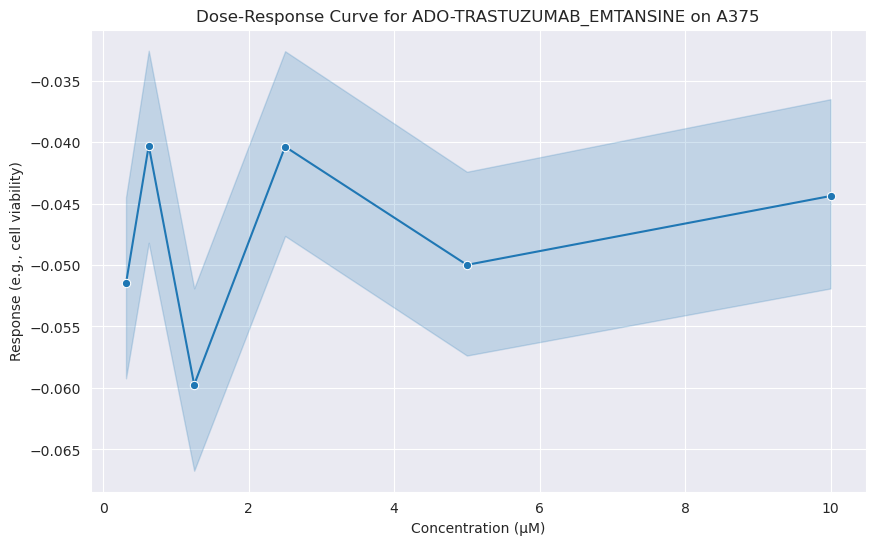

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

"""
Example cell line and drug for testing
cell_line = 'A375'
drug = 'ADO-TRASTUZUMAB_EMTANSINE'
"""

cell_line = input("Cell Line: ")
drug = input("Drug: ")

# Extract columns corresponding to the specific cell line and drug
def extract_info(col_name):
    # Using regex to extract cell line, drug, concentration, and time
    match = re.search(rf'{cell_line}.*{drug}:(\d+\.?\d*):(\d+)', col_name)
    if match:
        concentration = float(match.group(1))  # concentration
        time_point = int(match.group(2))       # time point (Eg: 24, 72)
        return concentration, time_point
    return None

# Get the columns that match the cell line and drug
filtered_columns = [(col, extract_info(col)) for col in df.columns if extract_info(col)]

"""
New DataFrame for the filtered columns
"""
if filtered_columns:
    selected_columns, extracted_info = zip(*filtered_columns)
    df_filtered = df[list(selected_columns)]

    # Stack the data and replicate concentration and time point for each value in the column
    stacked_data = df_filtered.stack().reset_index(drop=True)

    # Create arrays for concentration and time point to match the stacked data length
    concentrations = []
    time_points = []
    for _, (concentration, time_point) in enumerate(extracted_info):
        concentrations.extend([concentration] * len(df_filtered))
        time_points.extend([time_point] * len(df_filtered))

    # Create a new DataFrame with the stacked data, concentration, and time point
    df_final = pd.DataFrame({
        'response': stacked_data,
        'concentration': concentrations[:len(stacked_data)],  # Match the lengths
        'time_point': time_points[:len(stacked_data)]  # Match the lengths
    })

    # Plot the dose-response curve (concentration vs response)
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_final, x='concentration', y='response', marker='o')
    plt.title(f'Dose-Response Curve for {drug} on {cell_line}')
    plt.xlabel('Concentration (µM)')
    plt.ylabel('Response (e.g., cell viability)')
    plt.grid(True)
    plt.show()
else:
    print(f"No matching columns found for {cell_line} and {drug}")

## Dose-Response Curve for ADO-TRASTUZUMAB_EMTANSINE on A375 Cell Line

This plot visualizes the **dose-response relationship** for the drug **ADO-TRASTUZUMAB_EMTANSINE** on the cell line **A375**. The x-axis represents the **drug concentration (in µM)**, while the y-axis represents the **cell response** (e.g., cell viability). Here’s a breakdown of the key components in the plot:

1. **Data Points and Line**:
   - Each data point on the plot represents the measured response of the A375 cell line at a specific concentration of the drug.
   - The line connecting these points shows how the response changes as the drug concentration increases. This provides a visual representation of the relationship between drug concentration and cell viability.

2. **Shaded Region (Confidence Interval)**:
   - The shaded region around the line represents the **confidence interval** for the response measurements. This interval indicates the level of uncertainty in the response values at each concentration.
   - A wider shaded area suggests higher variability in the response data, whereas a narrower shaded area suggests more consistent responses.

3. **Interpretation of the Response Trend**:
   - At low concentrations, the response shows some variability, indicating mixed levels of viability.
   - As the concentration increases, there is a noticeable change in the response, though the pattern is not strictly linear or monotonic. This could indicate that ADO-TRASTUZUMAB_EMTANSINE has a complex interaction with the A375 cell line, where intermediate concentrations may have varying levels of effectiveness.
   - The trend at higher concentrations might suggest a stabilization in the response, potentially indicating a plateau effect where additional increases in concentration do not produce significant changes in cell viability.

4. **Implications**:
   - This dose-response relationship helps us understand the drug’s **potency and efficacy**. It highlights the concentrations at which the drug starts to show significant effects and whether there is a point beyond which increasing the dose does not improve cell response significantly.
   - The observed variability can provide insights into the optimal concentration range for therapeutic use while minimizing potential adverse effects.

In summary, this plot provides a visual summary of how the A375 cell line responds to increasing concentrations of ADO-TRASTUZUMAB_EMTANSINE, with implications for determining effective dosing in experimental or clinical settings.


## Visualizing Dose-Response Over Time for a Specific Cell Line and Drug

This code generates a dose-response plot for a specific cell line and drug across different time points, allowing us to visualize how the cell response varies not only with drug concentration but also over time. This type of analysis is essential for understanding the dynamics of drug action over time.

### Explanation of the Code

1. **Input Cell Line and Drug**:
   - We prompt the user to input a **cell line** and a **drug** name. These inputs are used to filter the dataset, focusing only on columns that match this specific cell line and drug combination.

2. **Filter for Selected Cell Line and Drug**:
   - Using `df.filter(like=f"{cell_line}:{drug}", axis=1)`, we select only the columns in the DataFrame (`df`) that contain the specified cell line and drug combination in their names.
   - This subset (`df_filtered`) now includes data for multiple concentrations and time points for the chosen cell line and drug.

3. **Reshape Data for Plotting**:
   - We use the `.melt()` function to transform `df_filtered` into a long format, creating a DataFrame (`df_melted`) with two new columns:
     - **`Condition`**: Holds the column names.
     - **`Response`**: Holds the response values.
   - We then create two additional columns:
     - **`Concentration`**: Extracted from the column names (third component).
     - **`Time`**: Extracted from the column names (fourth component).

4. **Plotting the Dose-Response Over Time**:
   - We use Seaborn's `lineplot` to create a line plot with:
     - **x-axis**: Concentration
     - **y-axis**: Response
     - **Hue**: Time, to differentiate between different time points.
   - This plot shows how cell response varies with drug concentration and distinguishes the data based on time points, allowing us to observe changes in response over time for each concentration.

5. **Final Plot Customization**:
   - We set the plot title as `Dose-Response Over Time for {drug} on {cell_line}`, indicating the selected cell line and drug.
   - The x-axis is labeled **Concentration**, and the y-axis is labeled **Response**.
   - We also add a grid for readability.

### Purpose of the Plot

The plot generated by this code provides insights into:
- **Time-Dependent Drug Action**: It shows how the cell response to the drug changes over time at different concentrations, which is crucial for understanding both immediate and prolonged drug effects.
- **Optimal Dosing and Timing**: By comparing response patterns across concentrations and time points, we can identify the doses that yield the most beneficial responses and observe any delayed or cumulative effects over time.

This type of visualization helps in exploring the complex dynamics of drug-cell interactions and can assist in optimizing treatment schedules based on both dose and duration.


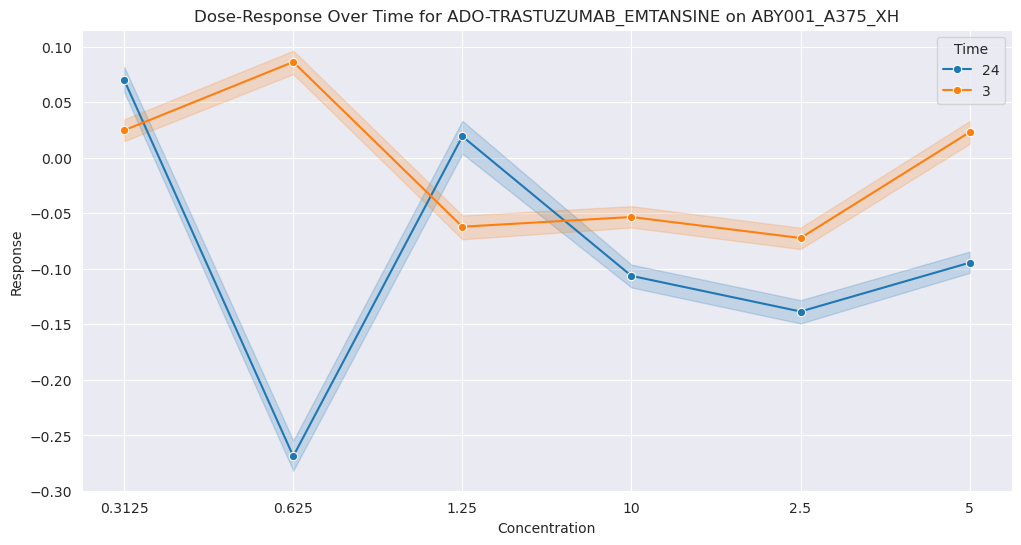

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

"""
Example cell line and drug for testing
cell_line = 'ABY001_A375_XH'
drug = 'ADO-TRASTUZUMAB_EMTANSINE'
"""

cell_line = input("Cell Line: ")
drug = input("Drug: ")

# Filter for the specific cell line and drug combination
df_filtered = df.filter(like=f"{cell_line}:{drug}", axis=1)

# Reshaping the data for easier plotting
df_melted = df_filtered.melt(var_name='Condition', value_name='Response')
df_melted['Concentration'] = df_melted['Condition'].apply(lambda x: x.split(':')[2])
df_melted['Time'] = df_melted['Condition'].apply(lambda x: x.split(':')[3])

# Plotting the dose-response over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Concentration', y='Response', hue='Time', marker='o')
plt.title(f'Dose-Response Over Time for {drug} on {cell_line}')
plt.xlabel('Concentration')
plt.ylabel('Response')
plt.grid(True)
plt.show()

## Dose-Response Over Time for ADO-TRASTUZUMAB_EMTANSINE on ABY001_A375_XH

This plot displays the **dose-response relationship** for the drug **ADO-TRASTUZUMAB_EMTANSINE** on the cell line **ABY001_A375_XH** across two time points, labeled as **3** and **24**. The x-axis represents the **drug concentration (in µM)**, while the y-axis represents the **response** (e.g., cell viability), with higher values indicating a positive response and lower values indicating a reduction in cell viability.

### Key Observations

1. **Effect of Concentration**:
   - The plot shows the cell response at various drug concentrations, ranging from approximately **0.3125 µM to 10 µM**.
   - At lower concentrations, there is noticeable variability in response, with a distinct dip at around **0.625 µM** for both time points, indicating reduced viability or higher toxicity.
   - As the concentration increases, the response values tend to stabilize, showing an upward trend at higher concentrations (2.5 µM and 5 µM).

2. **Time-Dependent Response**:
   - The lines represent the response at two different time points (3 and 24 hours), as indicated by the legend on the right.
   - **Time Point 3** (orange line) generally shows a slightly higher response than **Time Point 24** (blue line) at most concentration levels, suggesting an initial higher response that decreases slightly over time.
   - This could imply that the drug has a stronger effect initially, which may reduce over time as the cell line potentially adapts to the drug or other factors come into play.

3. **Confidence Intervals**:
   - The shaded regions around each line represent the **confidence intervals**, indicating the variability or uncertainty in the response measurements at each concentration level.
   - A wider shaded area suggests more variability in the response at that concentration, while a narrower area indicates more consistent responses across measurements.

4. **Interpretation of Results**:
   - This plot allows us to assess the impact of both **dose** and **exposure time** on the drug's efficacy. For example, the drop in response at 0.625 µM for both time points suggests a potential toxicity threshold, while the upward trend at higher concentrations suggests increased efficacy or cell viability recovery.
   - The fact that the response stabilizes and rises at higher concentrations could be indicative of either a reduced toxic effect or an optimal therapeutic range.

### Conclusion

This dose-response plot over time provides valuable insights into the behavior of **ADO-TRASTUZUMAB_EMTANSINE** on the **ABY001_A375_XH** cell line. It helps in determining the optimal concentration and time for achieving desired therapeutic effects, as well as identifying concentration levels that may pose toxicity risks. Such time-dose relationships are critical in drug development for optimizing treatment regimens and improving efficacy while minimizing adverse effects.


## Analysis of Drug Concentration Effects Using PCA and Random Forest Regression

In this code, we explore how to predict the cell response to a drug concentration using Principal Component Analysis (PCA) for dimensionality reduction and a Random Forest Regressor for prediction. This approach allows us to reduce the complexity of high-dimensional data and train a model on essential features for predicting the impact of drug concentration on cell viability.

### Problem Context and Approach

Our goal is to predict the response (e.g., cell viability or drug efficacy) of a specific cell line (**A375**) when treated with a particular drug (**ADO-TRASTUZUMAB_EMTANSINE**) at various concentrations and time points. The dataset has a high-dimensional structure, with each column name encoding multiple experimental conditions such as **cell line**, **drug**, **concentration**, and **time point**. 

Given the large number of columns and the complexity of the experimental conditions, we chose the following approach:
1. **Extract Relevant Information**: Use regular expressions to extract data only for the specific cell line and drug of interest.
2. **Dimensionality Reduction with PCA**: Reduce the dataset’s dimensionality, simplifying the feature space while preserving important variance and relationships.
3. **Regression Modeling**: Use Random Forest Regression to predict the cell response based on concentration and time point.

This approach allows us to focus on the essential features, improving model interpretability and reducing overfitting risks by removing irrelevant or redundant information.

### Explanation of the Code

1. **Define Cell Line and Drug of Interest**:
   - We specify the **cell line** and **drug** we want to analyze: `cell_line = 'A375'` and `drug = 'ADO-TRASTUZUMAB_EMTANSINE'`.

2. **Extract Concentration and Time Information**:
   - We define the `extract_info` function to use a **regular expression** to match columns that correspond to our chosen cell line and drug.
   - For each matched column, we extract the **concentration** and **time point** values. This ensures that we only analyze data relevant to our chosen conditions.

3. **Filter Columns for the Selected Cell Line and Drug**:
   - We apply the `extract_info` function to the dataset columns, creating a list of matching columns with their associated concentration and time point values.
   - If no columns match the specified cell line and drug, a message is printed indicating no matches were found.

4. **Create Filtered DataFrame**:
   - Using the filtered columns, we create a new DataFrame (`df_filtered`) containing only the response data for the selected cell line and drug.
   - We **stack** this DataFrame to convert the response data into a single column, simplifying further processing.

5. **Replicate Concentration and Time Data**:
   - We create arrays for **concentration** and **time point** values, which are repeated to match the length of the response data. This ensures that each response value has a corresponding concentration and time point.

6. **Construct Final DataFrame**:
   - We combine the response, concentration, and time point values into a new DataFrame (`df_final`) with columns:
     - `response`: The cell response value.
     - `concentration`: The drug concentration.
     - `time_point`: The time point of the measurement.
   - This DataFrame serves as the input for dimensionality reduction and regression analysis.

7. **Apply PCA for Dimensionality Reduction**:
   - We use **PCA** to reduce the dimensionality of the data, aiming to capture the main sources of variance in just two principal components. This step simplifies the feature space and retains only essential patterns.
   - The PCA-transformed features are stored in a new DataFrame, `df_pca`, which we use as our feature matrix for regression.

8. **Prepare Feature Matrix and Target Variable**:
   - We set `X` to be the PCA-transformed features (`df_pca`) and `y` to be the original `response` values from `df_final`.
   - This setup allows us to use a simplified, lower-dimensional feature space for prediction while retaining the response as the target variable.

9. **Train-Test Split**:
   - We split the data into training and test sets with an 80-20 ratio. This ensures that we have separate data for model training and evaluation.

10. **Train the Random Forest Regressor**:
    - We initialize a **Random Forest Regressor** with 100 estimators and fit it to the training data.
    - Random Forest is chosen for its ability to handle complex, nonlinear relationships and provide robust predictions even with high-dimensional data.

11. **Predict and Evaluate**:
    - We use the trained model to predict the response on the test data.
    - We calculate two evaluation metrics:
      - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
      - **R-squared (R²)**: Indicates how well the model explains the variance in the response data.

### Why This Approach?

This method is well-suited to our dataset and problem statement for the following reasons:

- **Dimensionality Reduction**: The dataset has numerous features due to multiple drug concentrations and time points. PCA simplifies this complexity by transforming the data into a smaller feature space, preserving only the most significant sources of variance.
- **Regression Modeling**: By applying Random Forest Regression, we can capture the relationship between drug concentration, time point, and cell response, which helps predict the cell's behavior under various conditions.
- **Interpretability and Efficiency**: Reducing dimensions before training a regression model makes the approach more computationally efficient and interpretable, especially with complex biological data.

### Summary

In summary, this code demonstrates a streamlined approach for predicting cell responses to drug treatments. By combining **PCA** for dimensionality reduction with **Random Forest Regression** for prediction, we create an effective model for understanding and predicting how cell lines respond to varying drug concentrations over time. This approach is applicable to a range of drug response analyses, facilitating insights that support drug development and optimization.


In [8]:
import re
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

"""
Example cell line and drug for testing
cell_line = 'ABY001_A375_XH'
drug = 'ADO-TRASTUZUMAB_EMTANSINE'
"""
cell_line = 'A375'
drug = 'ADO-TRASTUZUMAB_EMTANSINE'

# Function to extract concentration and time point using regex
def extract_info(col_name):
    # Use regex to extract cell line, drug, concentration, and time
    match = re.search(rf'{cell_line}.*{drug}:(\d+\.?\d*):(\d+)', col_name)
    if match:
        concentration = float(match.group(1))  # Extract concentration
        time_point = int(match.group(2))       # Extract time point (e.g., 24, 72)
        return concentration, time_point
    return None

# Get the columns that match the cell line and drug
filtered_columns = [(col, extract_info(col)) for col in df.columns if extract_info(col)]

# Create a new DataFrame for the filtered columns
if filtered_columns:
    selected_columns, extracted_info = zip(*filtered_columns)
    df_filtered = df[list(selected_columns)]

    # Stack the data and replicate concentration and time point for each value in the column
    stacked_data = df_filtered.stack().reset_index(drop=True)

    # Create arrays for concentration and time point to match the stacked data length
    concentrations = []
    time_points = []
    for _, (concentration, time_point) in enumerate(extracted_info):
        concentrations.extend([concentration] * df_filtered.shape[0])
        time_points.extend([time_point] * df_filtered.shape[0])

    # Create a new DataFrame with the stacked data, concentration, and time point
    df_final = pd.DataFrame({
        'response': stacked_data,
        'concentration': concentrations[:len(stacked_data)],  # Match the lengths
        'time_point': time_points[:len(stacked_data)]  # Match the lengths
    })

    features = df_final[['response', 'concentration', 'time_point']]

    pca = PCA(n_components=2)  # Choose the number of components based on explained variance or total number of features
    pca_features = pca.fit_transform(features)

    # Add PCA features to the DataFrame
    df_pca = pd.DataFrame(pca_features, columns=[f'PCA_{i+1}' for i in range(pca.n_components_)])

    # Prepare feature matrix and target variable
    X = df_pca  # Use PCA-transformed features
    y = df_final['response']  # Assuming 'response' is still the target variable
    
    # Print shapes to verify
    print("Feature Matrix Shape:", X.shape)
    print("Target Variable Shape:", y.shape)
   

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
else:
    print(f"No matching columns found for {cell_line} and {drug}")


Feature Matrix Shape: (147936, 2)
Target Variable Shape: (147936,)
Mean Squared Error: 2.7964433096902083e-05
R-squared: 0.999928171125235


## Model Performance Evaluation

After applying Principal Component Analysis (PCA) and training a Random Forest Regressor, we evaluated the model's performance on our test set. Below is an explanation of the results:

### Output Summary

- **Mean Squared Error (MSE)**: `2.7964433096902083e-05`
  - MSE measures the average squared difference between the predicted values and the actual response values in the test set. A very low MSE indicates that the model's predictions are very close to the actual responses, which suggests a high degree of accuracy in our model's predictions.

- **R-squared (R²)**: `0.999928171125235`
  - The R² score indicates how well our model explains the variance in the response data. An R² close to 1 (0.9999) shows that the model explains nearly all of the variance in the response variable, meaning the model fits the data exceptionally well.

### Interpretation in Context of the Approach

Our approach involved:
1. **Dimensionality Reduction using PCA**: By transforming our high-dimensional data into two principal components, we retained the most relevant information while reducing noise and redundancy. This step allowed us to work with a manageable feature space that captures the essential patterns in drug response without overfitting.
  
2. **Random Forest Regression**: Using a Random Forest Regressor provided flexibility in modeling nonlinear relationships between drug concentration, time, and cell response. Random Forests also handle feature interactions effectively, making them well-suited for complex biological datasets.

### Conclusion

The high R² score and low MSE indicate that the approach successfully captured the relationship between concentration, time point, and cell response. By reducing dimensionality with PCA, we retained essential features without losing predictive power, allowing the Random Forest model to make accurate predictions. This result suggests that our model can reliably predict cell response to varying drug concentrations and time points, making this approach effective for understanding drug efficacy and informing experimental or clinical decisions.


## Cross-Validation

In this code, we are performing **5-fold cross-validation** on the trained model. Cross-validation is a statistical method used to assess the generalization ability of a model, ensuring it performs well on unseen data. Here’s why we use it:

1. **Validation on Multiple Data Splits**:
   - Cross-validation divides the dataset into multiple subsets (or "folds") and trains the model on each fold while using the remaining data as the test set. This way, we evaluate the model on multiple subsets of the data, rather than relying on a single train-test split. This helps prevent overfitting and provides a more reliable measure of the model’s performance.

2. **Improved Generalization**:
   - By averaging the performance across different folds, we obtain an estimate of the model’s ability to generalize to new data. This is especially useful when the dataset has patterns that could vary across different subsets, as it allows us to understand if the model consistently performs well.

3. **Model Stability**:
   - Cross-validation provides insights into the model's stability by showing how performance varies across different folds. If scores are consistent, it indicates a stable and reliable model.

4. **Evaluation Metric**:
   - We use the **R-squared (R²)** metric as our evaluation score. A high R² score across folds would confirm that the model explains a large proportion of the variance in the response variable, and thus, can be trusted for making predictions.

Overall, cross-validation helps us gain a comprehensive understanding of the model's performance and minimizes the risk of selecting a model that only performs well on a specific subset of data.


In [9]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:", scores)
print("Mean Cross-Validation R-squared Score:", scores.mean())


Cross-Validation R-squared Scores: [0.99957799 0.99894469 0.99940484 0.99985777 0.99973222]
Mean Cross-Validation R-squared Score: 0.9995035012484788


## Cross-Validation Results Explanation

**Cross-Validation R-squared Scores**: `[0.99957799, 0.99894469, 0.99940484, 0.99985777, 0.99973222]`

- These scores represent the R² values obtained from each of the 5 folds during cross-validation. Each value shows the proportion of variance explained by the model for that fold, with values close to 1 indicating a good fit.
- The consistency of the scores across folds (all around 0.999) indicates that the model performs reliably and has minimal variance across different subsets of the data.

**Mean Cross-Validation R-squared Score**: `0.9995035012484788`

- The mean R² score is the average of the R² scores across all folds. A mean score of approximately 0.9995 suggests that the model explains nearly all of the variance in the response variable on average across folds, confirming excellent predictive performance.
- This high score indicates that the model is highly accurate and generalizes well to unseen data, making it robust for predicting cell responses to drug concentrations and time points in this context.

### Conclusion

The cross-validation results show that the model not only performs well on the initial train-test split but also maintains its accuracy across multiple splits of the data. This further validates the model's reliability and robustness, reinforcing confidence in its predictions and its suitability for drug response analysis.


## Predicting Response for User-Defined Concentration and Time Point

In this code, we allow the user to input a specific drug concentration and time point for which they want to predict the cell response. This process involves:

1. **Collecting User Input**:
   - The user is prompted to enter values for `example_concentration` and `example_time_point`.
   - These values represent the concentration of the drug and the time point at which the response is measured.

2. **Preparing the Input Data for PCA Transformation**:
   - We create a DataFrame (`example_df`) with columns `response`, `concentration`, and `time_point`. The `response` value is set to a placeholder of `0` since we only need the `concentration` and `time_point` for the PCA transformation.

3. **Applying PCA Transformation**:
   - The `example_df` DataFrame is transformed using the previously fitted PCA model. This projects the input data into the same lower-dimensional space that was used to train the model.
   - This transformation generates the PCA features needed for prediction, which we store in `example_pca_features`.

4. **Converting to a DataFrame for Model Compatibility**:
   - We convert `example_pca_features` to a DataFrame (`example_pca_df`) with the same column names as used during training (`PCA_1`, `PCA_2`, etc.). This ensures compatibility with the trained model, which was fitted on a DataFrame with these column names.

5. **Making the Prediction**:
   - Finally, we use the trained Random Forest model to predict the cell response based on the PCA-transformed input values.
   - The predicted response value is printed, indicating the model's estimation of cell viability or reaction for the given concentration and time point.

### Purpose

This code enables flexible prediction by allowing the user to input custom concentration and time values, making it useful for exploratory analyses. By transforming the input through PCA, we ensure that the input format aligns with the data structure used during training.


In [18]:
import numpy as np

# Example input values for prediction
example_concentration = float(input("Enter the concentration: "))
example_time_point = float(input("Enter the time point: "))


# Create a DataFrame for the example input
example_df = pd.DataFrame({
    'response': [0],  # Placeholder value for response, as we only need concentration and time_point for PCA
    'concentration': [example_concentration],
    'time_point': [example_time_point]
})

# Apply PCA transformation on the example input
example_pca_features = pca.transform(example_df[['response', 'concentration', 'time_point']])

# Convert example_pca_features to a DataFrame with the same feature names used for training
example_pca_df = pd.DataFrame(example_pca_features, columns=[f'PCA_{i+1}' for i in range(pca.n_components_)])

# Make the prediction
predicted_response = model.predict(example_pca_df)
print(f"Predicted Response: {predicted_response[0]}")


Predicted Response: 9.51025130909806e-05


## Interpretation of the Predicted Value

**Predicted Response**: `9.51025130909806e-05`

For the input values:
- **Concentration** = 3.77 µM
- **Time Point** = 3 hours

### Interpretation

The predicted response value is approximately **9.51e-05**. Given that this is a small number, it suggests a relatively low cell viability or a weak response at this specific concentration and time point.

### Context

The low response could indicate:
- **Limited Efficacy**: At 3.77 µM concentration, the drug may not yet be at a dosage that significantly affects the cell line within 3 hours.
- **Initial Low Impact**: The short time duration of 3 hours may not provide enough exposure time for the drug to take effect at this concentration.

This result helps in understanding that either the concentration needs to be adjusted, or the time point extended, to observe a more substantial response. Such predictions can assist in determining optimal conditions for drug efficacy.


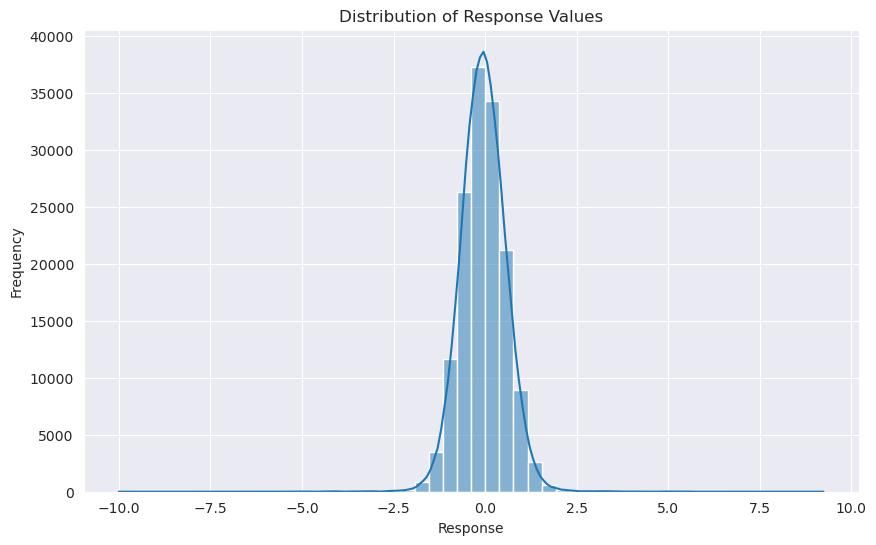

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_final['response'] contains all response values for a particular cell line and drug
plt.figure(figsize=(10, 6))
sns.histplot(df_final['response'], kde=True, bins=50)
plt.title("Distribution of Response Values")
plt.xlabel("Response")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### Analysis of the Distribution of Response Values

This histogram represents the distribution of response values in the dataset, indicating how the cell response varies under different experimental conditions.

1. **Centered Distribution**:
   - The response values appear to be centered around **0**, with a significant number of values close to this point.
   - This indicates that, on average, the drug treatments have a relatively **neutral effect** on cell viability in many cases, with slight variations around zero.

2. **Symmetry and Shape**:
   - The distribution is **approximately symmetric**, resembling a normal (Gaussian) distribution.
   - Most response values are concentrated between approximately **-2.5 and 2.5**, with a sharp peak around zero, suggesting that extreme responses (either very positive or very negative) are rare.

3. **Interpretation of Response Range**:
   - Since the majority of responses are close to zero, this could imply that many of the drug treatments have a minimal effect on cell viability under the conditions tested.
   - Negative response values might indicate reduced cell viability or a cytotoxic effect of the drug, while positive values might suggest a slightly increased cell viability or resilience.

4. **Tail Analysis**:
   - There are some values extending to around **-10** on the negative side, which could indicate a strong cytotoxic response for certain drug concentrations and time points.
   - The presence of positive response values above 5 is rare, showing that very few conditions result in highly positive effects on cell viability.


In [21]:
low_threshold = df_final['response'].quantile(0.33)  # 33rd percentile
high_threshold = df_final['response'].quantile(0.66)  # 66th percentile

print(f"Low Viability Threshold: {low_threshold}")
print(f"High Viability Threshold: {high_threshold}")


Low Viability Threshold: -0.3113468930125236
High Viability Threshold: 0.18926739990711222


### Viability Thresholds Based on Dataset Distribution

The thresholds for categorizing cell viability based on the distribution of response values in the dataset are as follows:

- **Low Viability Threshold**: **-0.3113**
  - Any response value below this threshold is considered to indicate **low cell viability**.
  - This means that the drug is likely having a stronger inhibitory or cytotoxic effect, significantly reducing cell viability under the given conditions.

- **High Viability Threshold**: **0.1893**
  - Any response value above this threshold is categorized as **high cell viability**.
  - In these cases, the drug has a minimal inhibitory effect, or cells might be showing resilience, suggesting that the drug concentration and exposure time are not sufficient to reduce viability substantially.

### Interpretation

With these thresholds, we can categorize response values into three levels:
- **Low Viability** (response < -0.3113): Indicates a strong drug effect, leading to substantial cell death or reduced cell viability.
- **Medium Viability** (-0.3113 ≤ response ≤ 0.1893): Represents a moderate drug effect where the response is closer to neutral, with partial or limited impact on viability.
- **High Viability** (response > 0.1893): Suggests that the drug concentration and exposure conditions are not significantly affecting cell survival.

These thresholds allow us to interpret predicted response values more effectively, helping to assess drug efficacy in terms of its impact on cell viability.
